In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import my_data_frequency_conversor as dfc
import my_models as mm


In [2]:
DATA_HOURS = 'DATA/ETHUSD-H1.csv'
DATA_DAYS = 'DATA/ETHUSD-D1.csv'
DATA_MONTHS = 'DATA/ETHUSD-Monthly.csv'
arima_h = mm.Model('ARIMA')
arima_d = mm.Model('ARIMA')
arima_m = mm.Model('ARIMA')
exp_smooth_h = mm.Model('EXPONENTIAL SMOOTHING')
exp_smooth_d = mm.Model('EXPONENTIAL SMOOTHING')
exp_smooth_m = mm.Model('EXPONENTIAL SMOOTHING')
holt_h = mm.Model('HOLT')
holt_d = mm.Model('HOLT')
holt_m = mm.Model('HOLT')
holt_winters_h = mm.Model('HOLT WINTERS')
holt_winters_d = mm.Model('HOLT WINTERS')
holt_winters_m = mm.Model('HOLT WINTERS')
timegpt_h = mm.Model('TIMEGPT')
timegpt_d = mm.Model('TIMEGPT')
timegpt_m = mm.Model('TIMEGPT')
lagllama_h = mm.Model('LAGLLAMA')
lagllama_d = mm.Model('LAGLLAMA')
lagllama_m = mm.Model('LAGLLAMA')


In [3]:
df = pd.read_csv(DATA_HOURS, delimiter=',')
train_data_hours, val_data_hours = dfc.split_data(df)
print(train_data_hours.head())
print(val_data_hours.head())

                       Open
DateTime                   
2017-01-01 00:00:00  8.0441
2017-01-01 01:00:00  8.1990
2017-01-01 02:00:00  8.2600
2017-01-01 03:00:00  8.4230
2017-01-01 04:00:00  8.5700
                       Open
DateTime                   
2024-01-01 00:00:00  2286.5
2024-01-01 01:00:00  2295.6
2024-01-01 02:00:00  2305.4
2024-01-01 03:00:00  2295.8
2024-01-01 04:00:00  2275.4


In [4]:
df = pd.read_csv(DATA_DAYS, delimiter=',')
train_data_days, val_data_days = dfc.split_data(df)
print(train_data_days.head())
print(val_data_days.head())

               Open
DateTime           
2017-01-01   8.0441
2017-01-02   8.2200
2017-01-03   8.3700
2017-01-04   9.6620
2017-01-05  11.0620
              Open
DateTime          
2024-01-01  2286.5
2024-01-02  2352.7
2024-01-03  2358.2
2024-01-04  2211.3
2024-01-05  2271.0


In [6]:
data_months = pd.read_csv(DATA_MONTHS, delimiter=',')
train_data_months, val_data_months = dfc.split_data(data_months)
print(train_data_months.head())
print(val_data_months.head())

               Open
DateTime           
2017-01-01   8.0441
2017-02-01  10.7110
2017-03-01  15.8300
2017-04-01  49.7770
2017-05-01  83.5180
              Open
DateTime          
2024-01-01  2286.5
2024-02-01  2283.0
2024-03-01  3339.2
2024-04-01  3650.6
2024-05-01  3020.3


In [ ]:
from darts.models import AutoARIMA
from darts import TimeSeries


In [ ]:
train_data_months_ts = TimeSeries.from_series(train_data_months, freq='MS')
arima_m.model = AutoARIMA()
arima_m.model.fit(train_data_months_ts)
#arima_m.predictions = arima_m.model.predict(12)

In [ ]:
train_data_days_ts = TimeSeries.from_series(train_data_days, freq='d')
arima_d.model = AutoARIMA()
arima_d.model.fit(train_data_days_ts)
#arima_d.predictions = arima_d.model.predict(366)

In [ ]:
train_data_hours_ts = TimeSeries.from_series(train_data_hours.asfreq('h').interpolate())
arima_h.model = AutoARIMA()
arima_h.model.fit(train_data_hours_ts)
#arima_h.predictions = arima_h.model.predict(366*24) 

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt

In [ ]:
# Ajustar el modelo con cálculo óptimo de alpha
exp_smooth_m.model = SimpleExpSmoothing(train_data_months).fit(optimized=True)

# Obtener el alpha óptimo
optimal_alpha = exp_smooth_m.model.model.params["smoothing_level"]
print(f"Alpha óptimo: {optimal_alpha:.4f}")

# Predicción a futuro (5 períodos)
forecast = exp_smooth_m.model.forecast(steps=5)
forecast


In [ ]:
holt_m.model = Holt(train_data_months).fit(optimized=True)
optimal_alpha = holt_m.model.model.params["smoothing_level"]
optimal_beta = holt_m.model.model.params["smoothing_trend"]
print(f"Alpha óptimo: {optimal_alpha:.4f}")
print(f"Beta óptimo: {optimal_beta:.4f}")
forecast = holt_m.model.forecast(steps=5)
forecast

In [ ]:
# Ajustar el modelo con cálculo óptimo de alpha
holt_winters_m.model = ExponentialSmoothing(train_data_months, trend='add', seasonal='add', seasonal_periods=12).fit(optimized=True)

# Obtener el alpha óptimo
optimal_params = holt_winters_m.model.params
print(f"Parámetros óptimos: {optimal_params}")

# Predicción a futuro (5 períodos)
forecast = holt_winters_m.model.forecast(steps=5)
forecast

In [16]:
from nixtla import NixtlaClient
from dotenv import load_dotenv
import os

load_dotenv()  # Carga el .env

my_api_key = os.getenv("MY_NIXTLA_API_KEY")

In [ ]:
nixtla_client = NixtlaClient(
    api_key = my_api_key
)
nixtla_client.validate_api_key()

timegpt_m.predictions = nixtla_client.predict(
    df=train_data_months,
    horizon=12,
    time_col='DateTime',
    target_col='Open',
)

timegpt_d.predictions = nixtla_client.predict(
    df=train_data_days,
    horizon=366,
    time_col='DateTime',
    target_col='Open',
)

timegpt_h.predictions = nixtla_client.predict(
    df=train_data_hours,
    horizon=366*24,
    time_col='DateTime',
    target_col='Open',
)


In [ ]:
#!git clone -b update-gluonts https://github.com/time-series-foundation-models/lag-llama/

In [29]:
my_lag_llama_path = os.getenv("MY_LAG_LLAMA_PATH")
os.chdir(my_lag_llama_path)

In [ ]:
#%pip install -U -r requirements.txt

In [ ]:
#!huggingface-cli download time-series-foundation-models/Lag-Llama lag-llama.ckpt --local-dir .

In [23]:
from itertools import islice

from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import torch
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset

from gluonts.dataset.pandas import PandasDataset
import pandas as pd

from lag_llama.gluon.estimator import LagLlamaEstimator

In [24]:
import sys
from types import ModuleType

# Create dummy module hierarchy
def create_dummy_module(module_path):
    """
    Create a dummy module hierarchy for the given path.
    Returns the leaf module.
    """
    parts = module_path.split('.')
    current = ''
    parent = None

    for part in parts:
        current = current + '.' + part if current else part
        if current not in sys.modules:
            module = ModuleType(current)
            sys.modules[current] = module
            if parent:
                setattr(sys.modules[parent], part, module)
        parent = current

    return sys.modules[module_path]

# Create the dummy gluonts module hierarchy
gluonts_module = create_dummy_module('gluonts.torch.modules.loss')

# Create dummy classes for the specific loss functions
class DistributionLoss:
    def __init__(self, *args, **kwargs):
        pass

    def __call__(self, *args, **kwargs):
        return 0.0

    def __getattr__(self, name):
        return lambda *args, **kwargs: None

class NegativeLogLikelihood:
    def __init__(self, *args, **kwargs):
        pass

    def __call__(self, *args, **kwargs):
        return 0.0

    def __getattr__(self, name):
        return lambda *args, **kwargs: None

# Add the specific classes to the module
gluonts_module.DistributionLoss = DistributionLoss
gluonts_module.NegativeLogLikelihood = NegativeLogLikelihood

In [25]:
def get_lag_llama_predictions(dataset, prediction_length, device, context_length=32, use_rope_scaling=False, num_samples=100):
    ckpt = torch.load("lag-llama.ckpt", map_location=device, weights_only=False) # Uses GPU since in this Colab we use a GPU.
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

    rope_scaling_arguments = {
        "type": "linear",
        "factor": max(1.0, (context_length + prediction_length) / estimator_args["context_length"]),
    }

    estimator = LagLlamaEstimator(
        ckpt_path="lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length, # Lag-Llama was trained with a context length of 32, but can work with any context length

        # estimator args
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],
        rope_scaling=rope_scaling_arguments if use_rope_scaling else None,

        nonnegative_pred_samples=True,

        batch_size=1,
        num_parallel_samples=100,
        device=device,
    )

    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=num_samples
    )
    forecasts = list(forecast_it)
    tss = list(ts_it)

    return forecasts, tss

In [26]:
# Define the dataset
data_months.rename(columns={"Open": "target"}, inplace=True)
# Convert numerical columns to float 32 format for lag-llama
for col in data_months.columns:
    # Check if column is not of string type
    if data_months[col].dtype != 'object' and pd.api.types.is_string_dtype(data_months[col]) == False:
        data_months[col] = data_months[col].astype('float32')

backtest_dataset = PandasDataset(data_months, freq="M")
prediction_length = 12  # Define your prediction length. We use 24 here since the data is of hourly frequency
num_samples = 100 # number of samples sampled from the probability distribution for each timestep
device = torch.device("cpu") # You can switch this to CPU or other GPUs if you'd like, depending on your environment

In [27]:
forecasts, tss = get_lag_llama_predictions(backtest_dataset, prediction_length, device, num_samples)

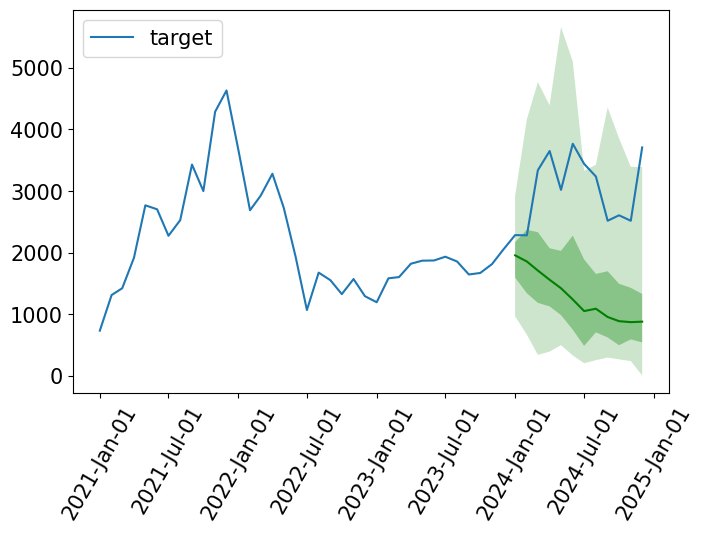

In [28]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%Y-%b-%d') 
plt.rcParams.update({'font.size': 15})

# Iterate through the first 9 series, and plot the predicted samples
for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)

    plt.plot(ts[-4 * prediction_length:].to_timestamp(), label="target", )
    forecast.plot( color='g')
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()
